In [1]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

In [2]:
states = pd.read_csv("cleaned_data.csv")
states

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
0,2020,AK,Kenai Peninsula,Cardiovascular Diseases,Heart Disease Mortality,165.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Hispanic,60.193263,-150.280744
1,2020,AL,Walker County,Cardiovascular Diseases,Heart Disease Mortality,109.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Hispanic,33.810226,-87.297070
2,2020,AL,St. Clair County,Cardiovascular Diseases,Heart Disease Mortality,90.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,33.716065,-86.314960
3,2020,FL,Polk County,Cardiovascular Diseases,Heart Disease Mortality,180.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,Hispanic,27.946050,-81.699391
4,2020,GA,Forsyth County,Cardiovascular Diseases,Heart Disease Mortality,133.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,34.228391,-84.124685
...,...,...,...,...,...,...,...,...,...,...,...
33426,2020,WA,Island County,Cardiovascular Diseases,Heart Disease Mortality,221.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,More than one race,48.046678,-122.562089
33427,2020,VA,Carroll County,Cardiovascular Diseases,Heart Disease Mortality,312.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,White,36.733046,-80.729746
33428,2020,VA,Petersburg City,Cardiovascular Diseases,Heart Disease Mortality,584.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,37.204297,-77.398058
33429,2020,VA,Lunenburg County,Cardiovascular Diseases,Heart Disease Mortality,455.6,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Black,36.951916,-78.245745


In [3]:
#clean data to remove non-states, 'AS','MP','GU','PR', from dataframe
cleaned_states = states[~(states['State'] == 'AS') & ~(states['State'] == 'MP') & ~(states['State'] == 'GU') & ~(states['State'] == 'PR')]

#group average death rate by state
state_death_rate = cleaned_states.loc[(cleaned_states["Gender"]=="Overall") & (cleaned_states["Ethnicity"]=="Overall")]
state_death_rate_df = state_death_rate.groupby('State')['Death_Rate(per M)'].mean()

state_death_rate_df = state_death_rate_df.sort_values(ascending=False)
state_death_rate_df

State
OK    494.041558
MS    489.210976
AL    488.714925
LA    479.304688
AR    464.186667
TN    456.377895
KY    441.730000
GA    413.442138
MO    406.493043
WV    399.118182
OH    396.476136
NV    389.129412
TX    384.708661
MI    382.748193
SC    381.632609
IN    367.296739
IL    358.661765
MD    356.854167
DC    355.800000
VA    353.115789
IA    352.414141
PA    350.207463
NC    343.154000
KS    341.729524
VT    331.021429
NY    330.517742
MT    326.912500
NJ    324.457143
WI    317.579167
DE    316.266667
SD    315.927273
NM    315.406061
FL    312.986567
NE    308.435484
ID    308.384091
ND    308.062264
UT    307.810345
ME    305.918750
WY    302.695652
AZ    302.193333
CA    290.860345
NH    290.800000
RI    290.060000
WA    286.535897
OR    284.283333
AK    280.192308
CT    279.087500
MN    262.511494
MA    255.814286
CO    255.756250
HI    243.760000
Name: Death_Rate(per M), dtype: float64

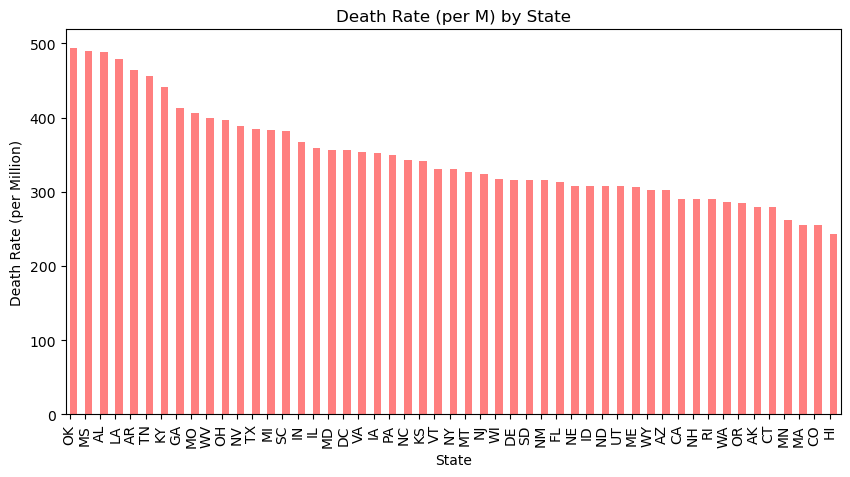

<Figure size 640x480 with 0 Axes>

In [4]:
#Plot death rate by state on bar graph
plt.figure(figsize=(10,5))

state_death_rate_df.plot(kind='bar', color='r', alpha=0.5, align="edge")

plt.title('Death Rate (per M) by State')
plt.xlabel('State')
plt.ylabel('Death Rate (per Million)')

plt.show()

# Save the figure____NEED TO DO THIS STILL
plt.savefig("states1.png", dpi=300)

In [5]:
#list the states by region
west = ["CA", "OR", "WA", "NV", "ID", "UT", "CO", "WY", "MT"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
southwest = ["AZ", "NM", "TX", "OK"]
southeast = ["AR", "LA", "MS", "TN", "AL", "KY", "GA", "WV", "VA", "NC", "SC", "FL", "MD", "DE"]
northeast = ["CT", "DC", "HI", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]
noncontig = ["HI", "AK"]
States = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "IA",
    "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO",
    "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK",
    "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI",
    "WV", "WY", "DC"]











In [6]:
#Create dataframe of MN counties

mn_county_df = cleaned_states.loc[(cleaned_states['State'] == 'MN') & 
                (cleaned_states["Gender"] == "Overall") &
                (cleaned_states["Ethnicity"] == "Overall")]
mn_county_df = mn_county_df.sort_values("Death_Rate(per M)",ascending=False)

mn_county_df

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
10770,2020,MN,Traverse County,Cardiovascular Diseases,Heart Disease Mortality,410.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,45.772558,-96.472541
8711,2020,MN,Wilkin County,Cardiovascular Diseases,Heart Disease Mortality,337.8,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,46.355541,-96.467235
12191,2020,MN,Faribault County,Cardiovascular Diseases,Heart Disease Mortality,328.7,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,43.674340,-93.949712
9906,2020,MN,Roseau County,Cardiovascular Diseases,Heart Disease Mortality,317.8,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,48.777024,-95.813732
10002,2020,MN,Goodhue County,Cardiovascular Diseases,Heart Disease Mortality,316.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,44.410900,-92.723112
...,...,...,...,...,...,...,...,...,...,...,...
14054,2020,MN,Hennepin County,Cardiovascular Diseases,Heart Disease Mortality,196.3,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,45.007722,-93.478024
12325,2020,MN,Todd County,Cardiovascular Diseases,Heart Disease Mortality,195.8,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,46.070466,-94.897940
13309,2020,MN,Dakota County,Cardiovascular Diseases,Heart Disease Mortality,195.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,44.675096,-93.068429
13758,2020,MN,Anoka County,Cardiovascular Diseases,Heart Disease Mortality,193.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,45.275002,-93.248864


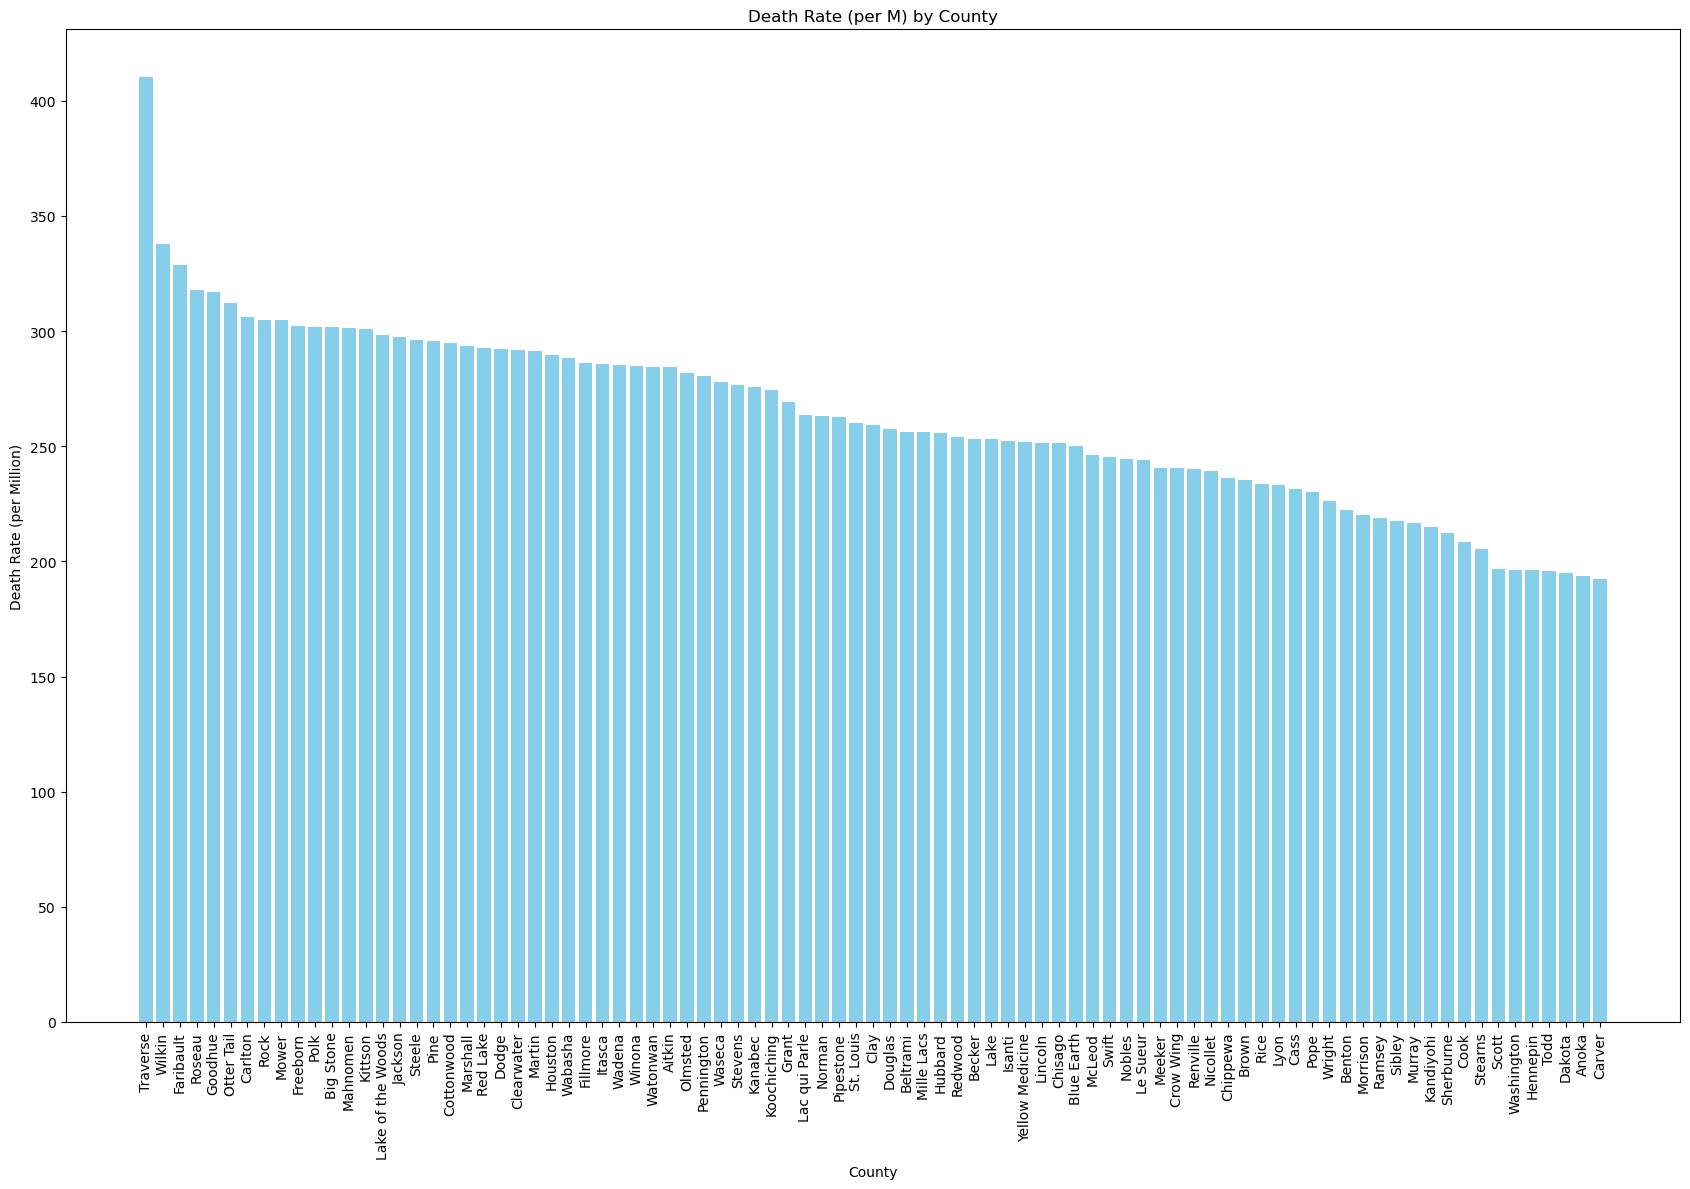

<Figure size 640x480 with 0 Axes>

In [7]:
#Graph death rate by county in MN
mn_county_df.loc[:, 'County'] = mn_county_df['County'].str.replace(' County', '')

plt.figure(figsize=(17,12))

plt.bar(mn_county_df['County'], mn_county_df['Death_Rate(per M)'], color='skyblue')


plt.title('Death Rate (per M) by County')
plt.xlabel('County')
plt.ylabel('Death Rate (per Million)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Save the figure____NEED TO DO THIS STILL
plt.savefig("states2.png", dpi=300)